In [2]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree,svm,neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras import backend as K
from keras import metrics
import functools

'\nfrom keras.layers import Dense, Dropout\nfrom keras.models import Sequential\nfrom keras.utils import to_categorical\nfrom keras.optimizers import RMSprop\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom keras.constraints import maxnorm\nfrom keras import backend as K\nfrom keras import metrics\nimport functools'

# Data

In [3]:
data = pd.read_csv('./../full_RASFF_DATA.csv', sep=';', 
                header=0, index_col = 0)
data ['DATE_CASE'] = data ['DATE_CASE'].astype(str)
data ['HAZARDS_CAT'] = data ['HAZARDS_CAT'].astype(str)
data = data.sample(frac = 1)
train = data
train

,NUMBER,CLASSIF,DATE_CASE,REF,NOT_COUNTRY,SUBJET,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,PRODUCT,HAZARDS,HAZARDS_CAT,ORIG_COUNTRY,DESTIN_COUNTRY,CONCERN_COUNTRY
13080,10206.0,alert,2017-01-02,2017.0001,Austria,shigatoxin-producing Escherichia coli (stx1+; ...,meat and meat products (other than poultry),food,undecided,public warning - press release,distribution to other member countries,deer sausage,shigatoxin-producing escherichia coli,microbial contaminants (other),Austria,Germany,
29240,26390.0,alert,2011-11-10,2011.1613,Slovakia,migration of formaldehyde (between 11.4 and 56...,food contact materials,fcm,undecided,withdrawal from the market,information on distribution not (yet) available,melamine spoons,migration of formaldehyde,migration,"China,Czech Republic",Slovakia,
690,696.0,border rejection,2020-04-24,2020.1758,Italy,unauthorised novel food roasted fox nuts (Eury...,"nuts, nut products and seeds",food,undecided,placed under customs seals,product not (yet) placed on the market,roasted fox nuts (euryale ferox),unauthorised novel food,novel food,India,,Italy
5870,3001.0,alert,2018-12-13,2018.3632,Netherlands,undeclared mustard and celery in curry tandoor...,"soups, broths, sauces and condiments",food,serious,recall from consumers,distribution restricted to notifying country,curry tandoori sauce,"celery undeclared,mustard undeclared","allergens,allergens",Belgium,Netherlands,
55312,52525.0,information,2003-02-17,2003.AJV,Italy,presence of bacterial inhibitor (presence) in ...,wild caught crustaceans and products thereof -...,food,undecided,import not authorised,,frozen shrimps (metapenaeus affinis),presence of bacterial inhibitor,residues of veterinary medicinal products,India,,"Italy,Spain"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27444,24592.0,alert,2012-04-25,2012.0586,France,Listeria monocytogenes (210 CFU/g) in raw milk...,milk and milk products,food,undecided,recall from consumers,distribution to other member countries,raw milk sheep cheese coated with herbs,listeria monocytogenes,microbial contaminants (other),France,"Austria,Belgium,Canada,Denmark,France,Germany,...",
12280,9399.0,alert,2017-04-05,2017.0433,Italy,pieces of wood in marshmallows from Spain,confectionery,food,serious,detained by operator,distribution restricted to notifying country,marshmallows,pieces of wood,foreign bodies,Spain,Italy,
8911,6040.0,border rejection,2018-02-19,2018.0425,Poland,"acetamiprid (0.28 mg/kg - ppm), imidacloprid (...","cocoa and cocoa preparations, coffee and tea",food,undecided,re-dispatch,product not (yet) placed on the market,black tea,"acetamiprid,etofenprox,imidacloprid,unauthoris...","pesticide residues,pesticide residues,pesticid...",Vietnam,,Poland
9798,6924.0,information for follow-up,2017-11-16,2017.1973,France,unauthorised novel food ingredient Epimedium g...,"dietetic foods, food supplements, fortified foods",food,undecided,,information on distribution not (yet) available,food supplement,unauthorised novel food ingredient epimedium g...,novel food,United Kingdom,,France


In [4]:
features = [0,1,2,6,8]
target = [7]
X = train.iloc[:,features]
y = train.iloc[:,target]

In [5]:
X 


,NUMBER,CLASSIF,DATE_CASE,PROD_CAT,RISK_DECISION
13080,10206.0,alert,2017-01-02,meat and meat products (other than poultry),undecided
29240,26390.0,alert,2011-11-10,food contact materials,undecided
690,696.0,border rejection,2020-04-24,"nuts, nut products and seeds",undecided
5870,3001.0,alert,2018-12-13,"soups, broths, sauces and condiments",serious
55312,52525.0,information,2003-02-17,wild caught crustaceans and products thereof -...,undecided
...,...,...,...,...,...
27444,24592.0,alert,2012-04-25,milk and milk products,undecided
12280,9399.0,alert,2017-04-05,confectionery,serious
8911,6040.0,border rejection,2018-02-19,"cocoa and cocoa preparations, coffee and tea",undecided
9798,6924.0,information for follow-up,2017-11-16,"dietetic foods, food supplements, fortified foods",undecided


In [6]:
y

,TYPE
13080,food
29240,fcm
690,food
5870,food
55312,food
...,...
27444,food
12280,food
8911,food
9798,food


In [7]:
encX = OneHotEncoder(handle_unknown='ignore')
#encX = OrdinalEncoder()
#encX = FeatureHasher(n_features=25,input_type='string')
#encX = MultiLabelBinarizer()
encX.fit(X.values)
X_one_hot = encX.transform(X.values)

In [8]:
ency = OneHotEncoder(handle_unknown='ignore', sparse = False)
ency.fit(y.values)
y_one_hot = ency.transform(y.values)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y_one_hot, test_size=0.2, random_state=42, shuffle = True)

In [10]:
top3_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

top2_acc = functools.partial(metrics.top_k_categorical_accuracy, k=2)
top2_acc.__name__ = 'top3_acc'

NameError: name 'functools' is not defined

# Model

In [11]:
K.clear_session()
model = Sequential()
model.add(Dense(2048, activation="relu", input_dim=len(X_train[1].toarray().flatten())))
model.add(Dropout(0.5))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(35, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])

NameError: name 'K' is not defined

In [12]:
model.summary()
hist = model.fit(X_train,y_train, epochs= 170,validation_data=( X_test, y_test), batch_size = 500)

NameError: name 'model' is not defined

In [ ]:
prediction = model.predict(X_test[1], verbose=1)

In [ ]:
np.around(prediction,decimals = 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

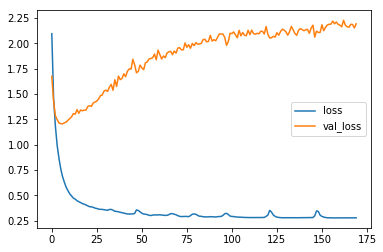

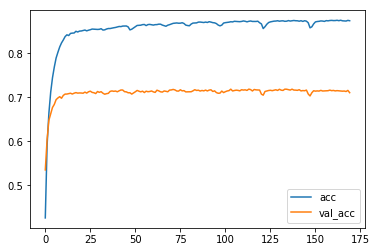

In [ ]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['categorical_accuracy'], label = 'acc') 
plt.plot(hist.history['val_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()

# Grid Search Tests

In [ ]:
def create_model(activation = 'relu' ):
    model = Sequential()
    model.add(Dense(2500, activation=activation, input_dim=len(X_train[1].toarray().flatten())))
    model.add(Dense(1500, activation="relu"))
    model.add(Dense(1000, activation="relu"))
    model.add(Dense(38, activation = "softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=1,batch_size = 500, epochs = 30)

In [ ]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation = activation)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_one_hot, y_one_hot)

Epoch 1/30
32858/32858 [==============================] - 2s 50us/step - loss: 3.0068 - acc: 0.1298
Epoch 2/30
32858/32858 [==============================] - 1s 21us/step - loss: 2.8431 - acc: 0.1481
Epoch 3/30
32858/32858 [==============================] - 1s 20us/step - loss: 2.7422 - acc: 0.1853
Epoch 4/30
32858/32858 [==============================] - 1s 20us/step - loss: 2.6022 - acc: 0.2515
Epoch 5/30
32858/32858 [==============================] - 1s 20us/step - loss: 2.4370 - acc: 0.3060
Epoch 6/30
32858/32858 [==============================] - 1s 20us/step - loss: 2.3086 - acc: 0.3526
Epoch 7/30
32858/32858 [==============================] - 1s 20us/step - loss: 2.2439 - acc: 0.3755
Epoch 8/30
32858/32858 [==============================] - 1s 20us/step - loss: 2.1838 - acc: 0.3954
Epoch 9/30
32858/32858 [==============================] - 1s 21us/step - loss: 2.1351 - acc: 0.4087
Epoch 10/30
32858/32858 [==============================] - 1s 20us/step - loss: 2.0963 - acc: 0.4200

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.677689 using {'optimizer': 'Nadam'}
0.298527 (0.001156) with: {'optimizer': 'SGD'}
0.673824 (0.000837) with: {'optimizer': 'RMSprop'}
0.676989 (0.002876) with: {'optimizer': 'Adagrad'}
0.664724 (0.003272) with: {'optimizer': 'Adadelta'}
0.675695 (0.002678) with: {'optimizer': 'Adam'}
0.672287 (0.002191) with: {'optimizer': 'Adamax'}
0.677689 (0.001324) with: {'optimizer': 'Nadam'}


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.674813 using {'epochs': 170}
0.673991 (0.003926) with: {'epochs': 90}
0.674265 (0.004565) with: {'epochs': 110}
0.674204 (0.001643) with: {'epochs': 130}
0.673276 (0.002754) with: {'epochs': 150}
0.674813 (0.002283) with: {'epochs': 170}


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.675802 using {'batch_size': 500, 'epochs': 90}
0.669502 (0.002298) with: {'batch_size': 300, 'epochs': 10}
0.668528 (0.001172) with: {'batch_size': 300, 'epochs': 30}
0.672941 (0.003180) with: {'batch_size': 300, 'epochs': 50}
0.672485 (0.001963) with: {'batch_size': 300, 'epochs': 70}
0.674585 (0.006528) with: {'batch_size': 300, 'epochs': 90}
0.661057 (0.000761) with: {'batch_size': 500, 'epochs': 10}
0.673306 (0.002754) with: {'batch_size': 500, 'epochs': 30}
0.671998 (0.003515) with: {'batch_size': 500, 'epochs': 50}
0.670050 (0.002602) with: {'batch_size': 500, 'epochs': 70}
0.675802 (0.003698) with: {'batch_size': 500, 'epochs': 90}
0.658059 (0.000380) with: {'batch_size': 700, 'epochs': 10}
0.671313 (0.004291) with: {'batch_size': 700, 'epochs': 30}
0.672059 (0.003667) with: {'batch_size': 700, 'epochs': 50}
0.669487 (0.004382) with: {'batch_size': 700, 'epochs': 70}
0.672956 (0.001552) with: {'batch_size': 700, 'epochs': 90}
0.657268 (0.000441) with: {'batch_size': 1000

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.647531 using {'neuronas1': 300, 'neuronas2': 250, 'neuronas3': 50}
0.616545 (0.002834) with: {'neuronas1': 100, 'neuronas2': 70, 'neuronas3': 50}
0.621167 (0.005326) with: {'neuronas1': 100, 'neuronas2': 70, 'neuronas3': 100}
0.624211 (0.003272) with: {'neuronas1': 100, 'neuronas2': 70, 'neuronas3': 150}
0.632580 (0.003462) with: {'neuronas1': 100, 'neuronas2': 180, 'neuronas3': 50}
0.634216 (0.000457) with: {'neuronas1': 100, 'neuronas2': 180, 'neuronas3': 100}
0.638058 (0.001446) with: {'neuronas1': 100, 'neuronas2': 180, 'neuronas3': 150}
0.634958 (0.001807) with: {'neuronas1': 100, 'neuronas2': 250, 'neuronas3': 50}
0.633569 (0.000418) with: {'neuronas1': 100, 'neuronas2': 250, 'neuronas3': 100}
0.638401 (0.001674) with: {'neuronas1': 100, 'neuronas2': 250, 'neuronas3': 150}
0.631686 (0.005193) with: {'neuronas1': 200, 'neuronas2': 70, 'neuronas3': 50}
0.633836 (0.001788) with: {'neuronas1': 200, 'neuronas2': 70, 'neuronas3': 100}
0.635433 (0.001370) with: {'neuronas1': 200

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.643764 using {'neuronas1': 200, 'neuronas2': 300, 'neuronas3': 200}
0.616141 (0.001236) with: {'neuronas1': 100, 'neuronas2': 100, 'neuronas3': 100}
0.629049 (0.001597) with: {'neuronas1': 100, 'neuronas2': 100, 'neuronas3': 200}
0.629335 (0.001464) with: {'neuronas1': 100, 'neuronas2': 100, 'neuronas3': 300}
0.628270 (0.005798) with: {'neuronas1': 100, 'neuronas2': 200, 'neuronas3': 100}
0.633764 (0.000304) with: {'neuronas1': 100, 'neuronas2': 200, 'neuronas3': 200}
0.635095 (0.004981) with: {'neuronas1': 100, 'neuronas2': 200, 'neuronas3': 300}
0.633574 (0.005779) with: {'neuronas1': 100, 'neuronas2': 300, 'neuronas3': 100}
0.630057 (0.001578) with: {'neuronas1': 100, 'neuronas2': 300, 'neuronas3': 200}
0.637719 (0.005323) with: {'neuronas1': 100, 'neuronas2': 300, 'neuronas3': 300}
0.628707 (0.004030) with: {'neuronas1': 200, 'neuronas2': 100, 'neuronas3': 100}
0.634430 (0.003023) with: {'neuronas1': 200, 'neuronas2': 100, 'neuronas3': 200}
0.635285 (0.003346) with: {'neuro